<a href="https://colab.research.google.com/github/jmparradov/MachineLearning_Project/blob/dev_jonathan/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importación de liberías

In [131]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
import os

# Graficas
# ==============================================================================
import matplotlib.pyplot as plt

# Funciones externas
# ==============================================================================

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PrimerSemestre/MachineLearning
from utils.funciones import multiple_plot





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/PrimerSemestre/MachineLearning


#2. Extracción de datos
### Se obtienen los dataset de un Github dispuesto por el equipo, para la disponibilidad y seguridad de la información.

In [132]:
url = 'https://raw.githubusercontent.com/jmparradov/MachineLearning_Project/refs/heads/main/datos_ruido_areametropolitana.csv'

df = pd.read_csv(url)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66456 entries, 0 to 66455
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   est       66456 non-null  object 
 1   BEL-ALCA  0 non-null      float64
 2   BEL-USBV  5148 non-null   float64
 3   CEN-TRAF  36861 non-null  float64
 4   GIR-BOTJ  54247 non-null  float64
 5   GIR-SOSN  15745 non-null  float64
 6   ITA-ACUA  34312 non-null  float64
 7   ITA-CODI  15164 non-null  float64
 8   ITA-SAMA  35604 non-null  float64
 9   MED-PJIC  17845 non-null  float64
 10  MED-PJIR  29557 non-null  float64
 11  MED-PLMA  13958 non-null  float64
 12  MED-SIAT  50069 non-null  float64
 13  MED-UNFM  0 non-null      float64
 14  MED-ZOOL  39377 non-null  float64
 15  SAB-SEMS  49006 non-null  float64
dtypes: float64(15), object(1)
memory usage: 8.1+ MB


#3. Formato y transformación de los datos

### Convertimos la variable "est" que se refiere a la fecha de la medición en varias columnas que separan los formatos de tiempo, para facilitar la detección de correlaciones.

In [133]:
df['est'] = pd.to_datetime(df['est'], format='%m/%d/%y %H:%M')

id_vars = ['est']
value_vars = [col for col in df.columns if col not in id_vars]

d = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='location', value_name='noise_values')

d['year'] = d['est'].dt.year
d['month'] = d['est'].dt.month
d['day_of_month'] = d['est'].dt.day
d['week_number'] = d['est'].dt.isocalendar().week
d['day_of_week'] = d['est'].dt.dayofweek  # 0 = Monday, 6 = Sunday
d['hour'] = d['est'].dt.hour
d['day_month'] = d['est'].dt.strftime('%d-%m')

d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996840 entries, 0 to 996839
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   est           996840 non-null  datetime64[ns]
 1   location      996840 non-null  object        
 2   noise_values  396893 non-null  float64       
 3   year          996840 non-null  int32         
 4   month         996840 non-null  int32         
 5   day_of_month  996840 non-null  int32         
 6   week_number   996840 non-null  UInt32        
 7   day_of_week   996840 non-null  int32         
 8   hour          996840 non-null  int32         
 9   day_month     996840 non-null  object        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(5), object(2)
memory usage: 54.2+ MB


#4. Limpieza de datos

###Realizaremos la limpieza común, de duplicados y nullos, para nuestros datos de "noise_values".

Busqueda de duplicados:

In [134]:
d.loc[d.duplicated()]

,est,location,noise_values,year,month,day_of_month,week_number,day_of_week,hour,day_month


Eliminar duplicados y Nullos:

In [135]:
d = d.drop_duplicates()
d = d.dropna(subset=['noise_values'])
d.reset_index(drop=True, inplace=True)

#5. Visualización de datos

###Vamos a dar un primer vistazo al comportamiento de los datos, sin realizar procesos adicionales a las limpiezas comunes.

Verificación de categorias:

In [154]:
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(5)

,location,day_month
8829,CEN-TRAF,01-01
8830,CEN-TRAF,01-01
8831,CEN-TRAF,01-01
8832,CEN-TRAF,01-01
8833,CEN-TRAF,01-01


Verifiación de numericas:

In [137]:
numCols=d.select_dtypes(include = ['float64','int32','int64', 'UInt32']).columns.tolist()
d[numCols].head()

,noise_values,year,month,day_of_month,week_number,day_of_week,hour
0,56.0000,2023,11,23,47,3,16
1,53.8000,2023,11,23,47,3,17
2,52.9000,2023,11,23,47,3,18
3,52.4000,2023,11,23,47,3,19
4,51.1000,2023,11,23,47,3,20


Vistazo de forma gráfica a las variables númericas.

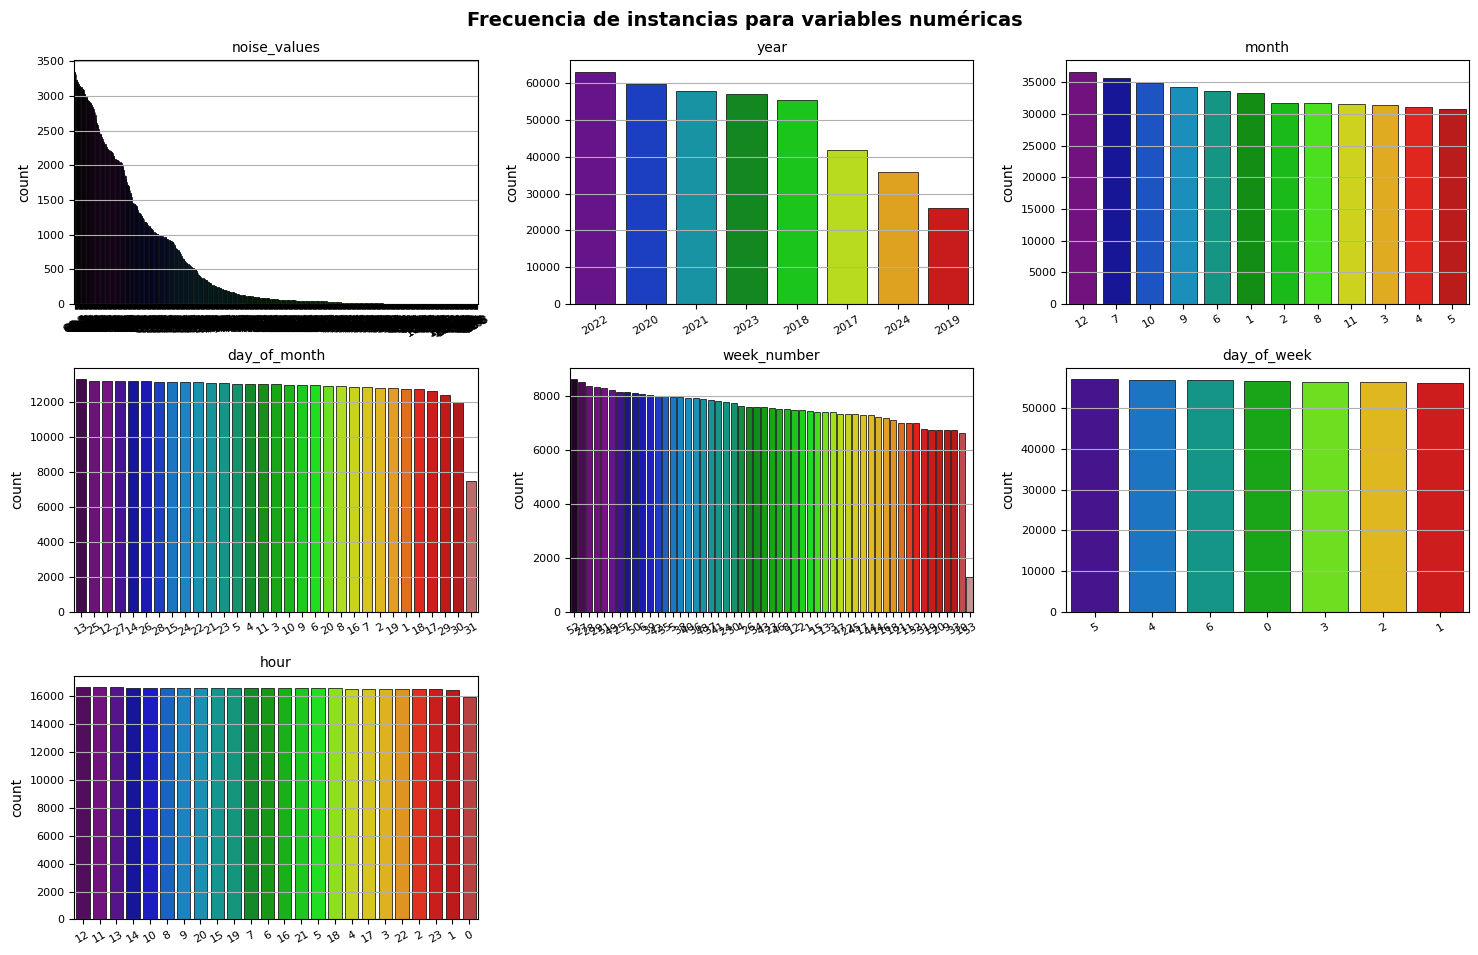

In [138]:
multiple_plot(3, d , numCols, None, 'countplot', 'Frecuencia de instancias para variables numéricas',30)

Vistazo de forma gráfica a las variables categóricas:

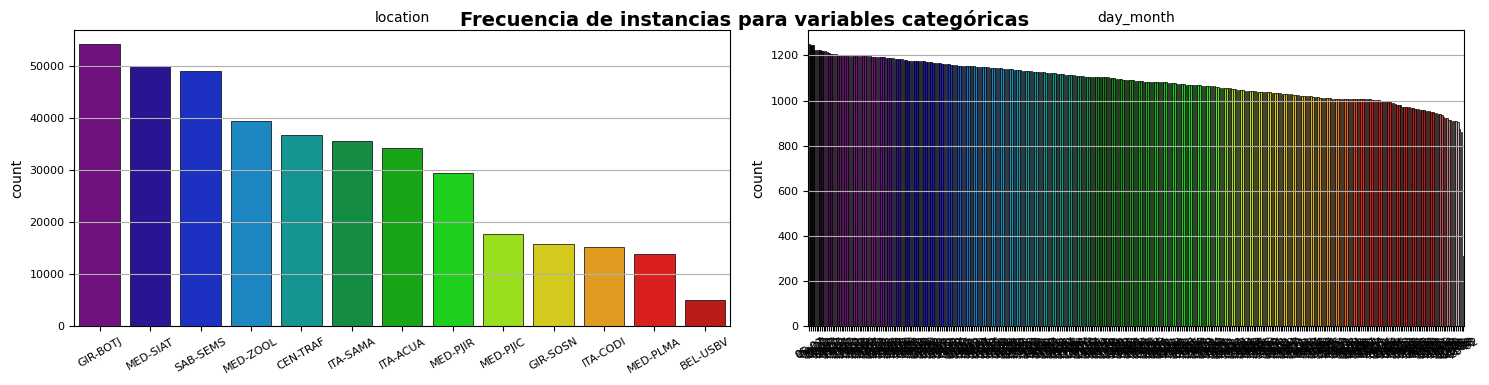

In [139]:
multiple_plot(2, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

#6. Balanceo

Vamos a filtrar el dataset a los años que más tienen información continua y poseen una cantidad de medidas parecidas entre sí.

In [140]:
d = d[d['year'].isin([2023,2022,2021,2020])]

print(d)

                       est  location  noise_values  year  month  day_of_month  \
0      2023-11-23 16:00:00  BEL-USBV       56.0000  2023     11            23   
1      2023-11-23 17:00:00  BEL-USBV       53.8000  2023     11            23   
2      2023-11-23 18:00:00  BEL-USBV       52.9000  2023     11            23   
3      2023-11-23 19:00:00  BEL-USBV       52.4000  2023     11            23   
4      2023-11-23 20:00:00  BEL-USBV       51.1000  2023     11            23   
...                    ...       ...           ...   ...    ...           ...   
392299 2023-12-31 19:00:00  SAB-SEMS       65.8000  2023     12            31   
392300 2023-12-31 20:00:00  SAB-SEMS       66.6000  2023     12            31   
392301 2023-12-31 21:00:00  SAB-SEMS       66.8000  2023     12            31   
392302 2023-12-31 22:00:00  SAB-SEMS       68.3000  2023     12            31   
392303 2023-12-31 23:00:00  SAB-SEMS       67.4000  2023     12            31   

        week_number  day_of

Revisamos los sensores de medición, para quedarnos con los más adecuados para el proyecto.

In [141]:
d["location"].unique()

array(['BEL-USBV', 'CEN-TRAF', 'GIR-BOTJ', 'ITA-ACUA', 'ITA-SAMA',
       'MED-PJIR', 'MED-SIAT', 'MED-ZOOL', 'SAB-SEMS'], dtype=object)

In [142]:
d = d[d['location'].isin(['CEN-TRAF', 'GIR-BOTJ', 'ITA-ACUA',
       'ITA-SAMA', 'MED-PJIR',
       'MED-SIAT', 'MED-ZOOL', 'SAB-SEMS'])]

Graficamos los datos después del balance.

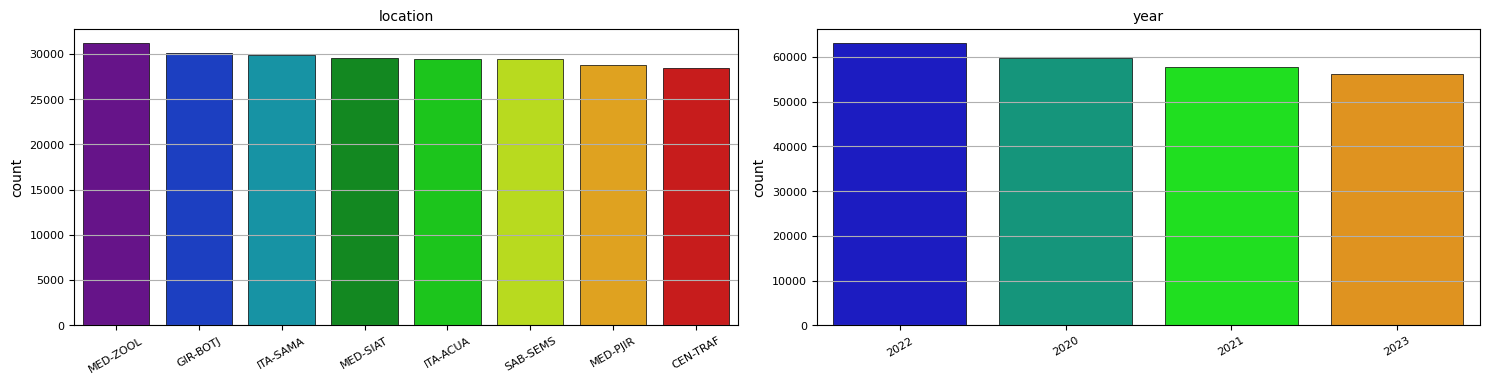

In [144]:
multiple_plot(2, d , ['location', 'year'], None, 'countplot', '',30)

#Graficas para el análisis visual de los datasets

#Desviación standard del noise_values vs la media de la medición por hora de cada Sensor.

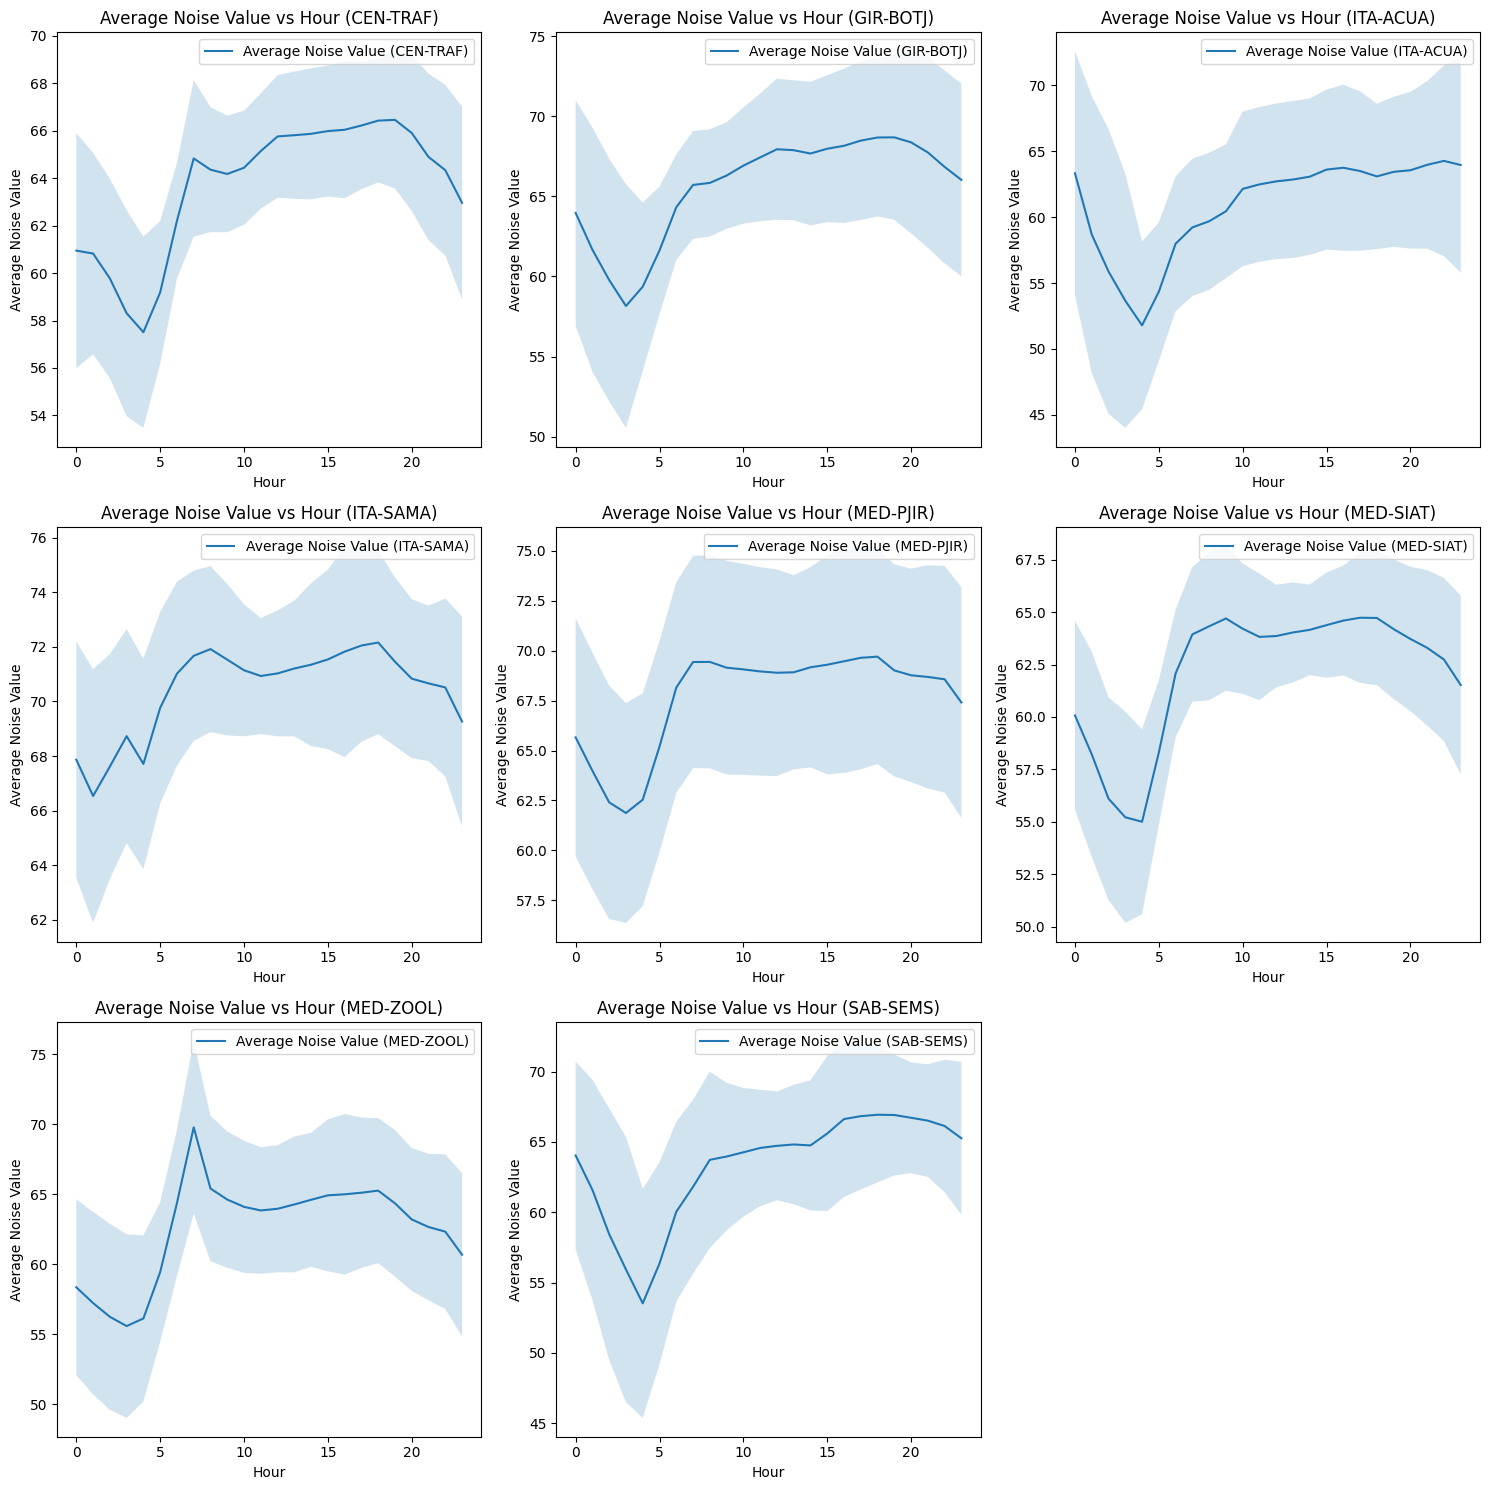

In [145]:
grouped_data = d.groupby(['location', 'hour'])['noise_values'].agg(['mean', 'std'])
grouped_data = grouped_data.reset_index()

num_locations = len(grouped_data['location'].unique())
rows = (num_locations + 2) // 3  # Calcula el númro de rows
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()  # Genera la sombra

# Lo hacemos para cada númerica
for i, location in enumerate(grouped_data['location'].unique()):
  location_data = grouped_data[grouped_data['location'] == location]
  ax = axes[i]

  ax.plot(location_data['hour'], location_data['mean'], label=f'Average Noise Value ({location})')

  ax.fill_between(location_data['hour'], location_data['mean'] - location_data['std'],
                  location_data['mean'] + location_data['std'], alpha=0.2)

  ax.set_xlabel('Hour')
  ax.set_ylabel('Average Noise Value')
  ax.set_title(f'Average Noise Value vs Hour ({location})')
  ax.legend()


for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Varianza de las mediciones por mes de cada año del historico [2023,2022,2021,2020]

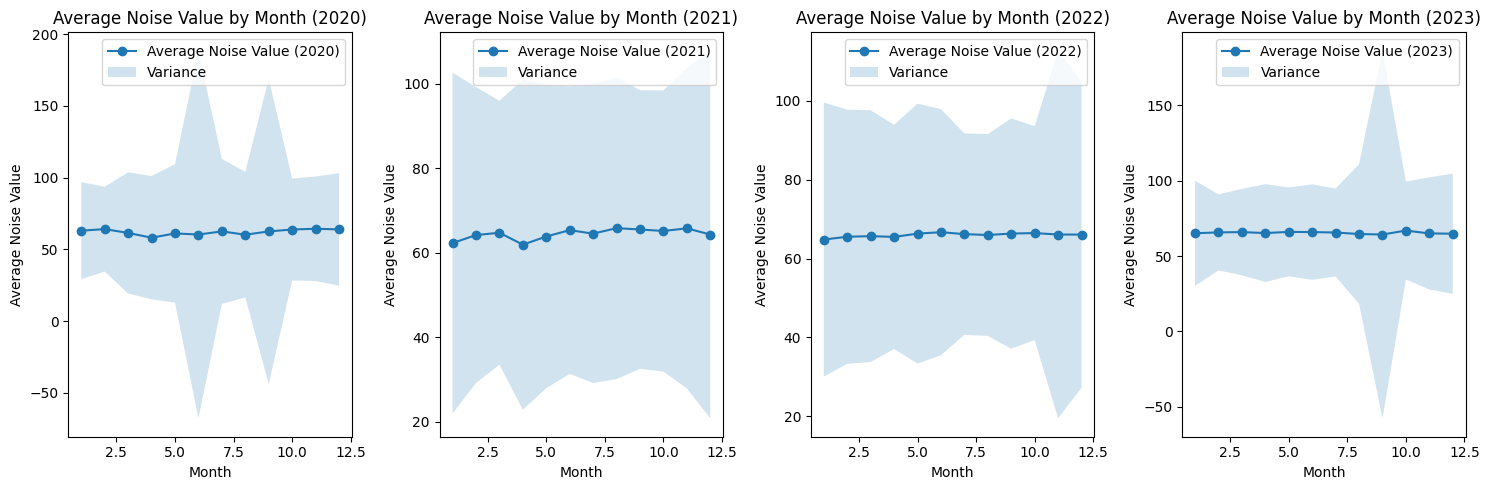

In [146]:
average_noise_by_month = d.groupby(['year', 'month'])['noise_values'].mean().unstack()
variance_noise_by_month = d.groupby(['year', 'month'])['noise_values'].var().unstack()
fig, axes = plt.subplots(1, len(average_noise_by_month.index), figsize=(15, 5))

for i, year in enumerate(average_noise_by_month.index):
  ax = axes[i]

  ax.plot(average_noise_by_month.columns, average_noise_by_month.loc[year], marker='o', label=f'Average Noise Value ({year})')

  ax.fill_between(average_noise_by_month.columns,
                  average_noise_by_month.loc[year] - variance_noise_by_month.loc[year],
                  average_noise_by_month.loc[year] + variance_noise_by_month.loc[year],
                  alpha=0.2, label='Variance')

  ax.set_xlabel('Month')
  ax.set_ylabel('Average Noise Value')
  ax.set_title(f'Average Noise Value by Month ({year})')
  ax.legend()

plt.tight_layout()
plt.show()


#7. Comportamiento de los datos

Logramos ver como nuestros datos tienen un comportamiento normal y nos dan la aprobación para continuar el proceso del proyecto.

Text(0, 0.5, 'Frequency')

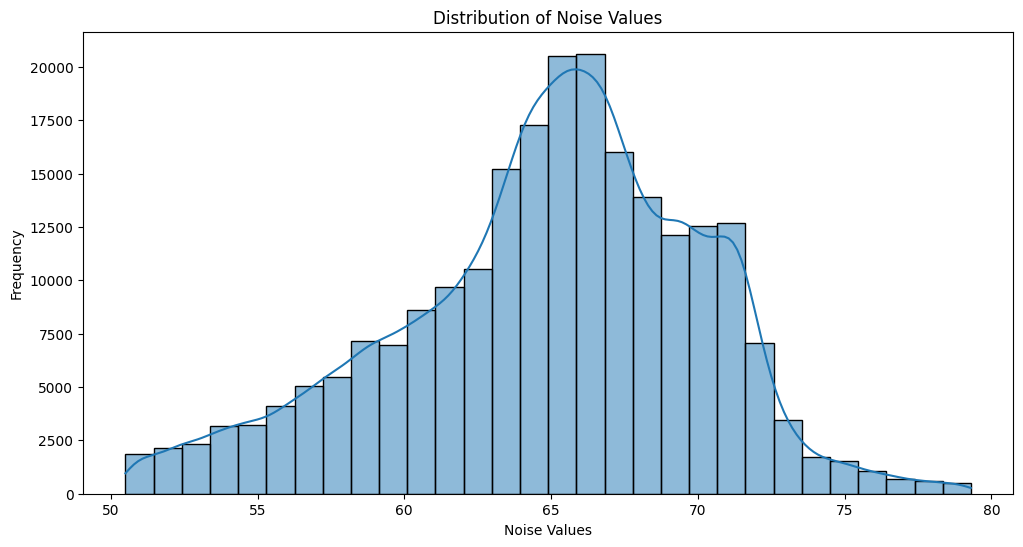

In [155]:
plt.figure(figsize=(12, 6))
sns.histplot(d['noise_values'], kde=True, bins=30)
plt.title('Distribution of Noise Values')
plt.xlabel('Noise Values')
plt.ylabel('Frequency')


#8. Outliers

Realizamos una detección por Quantiles validando los outliers inferiores y superiores

Number of rows before removing outliers: 236850
Number of rows after removing outliers: 227836


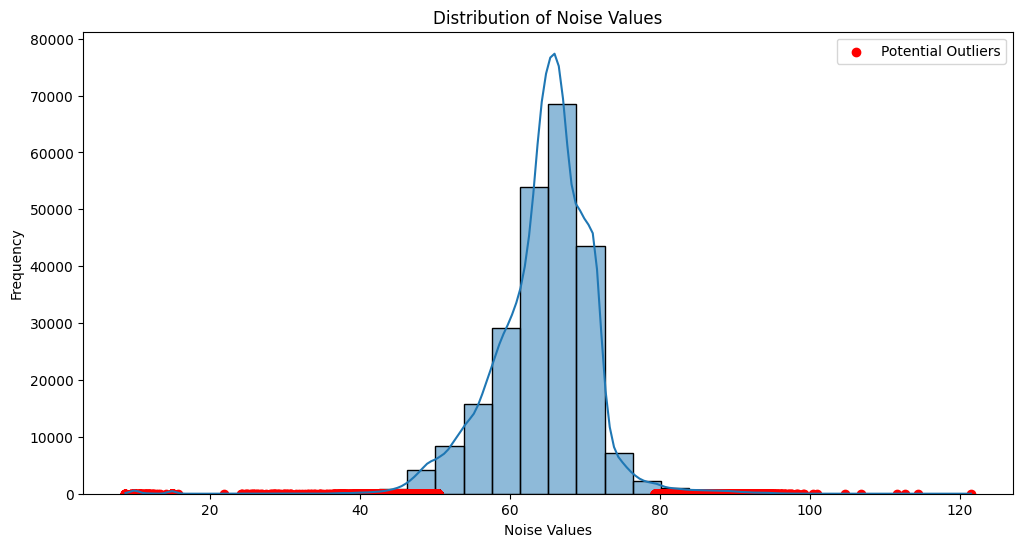

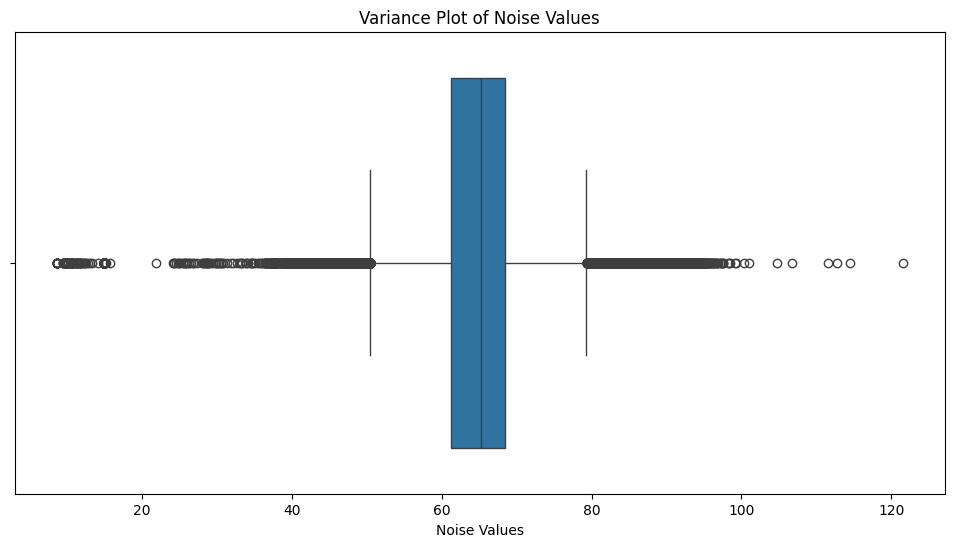

In [147]:
Q1 = d['noise_values'].quantile(0.25)
Q3 = d['noise_values'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Number of rows before removing outliers: {len(d)}")
print(f"Number of rows after removing outliers: {len(d_no_outliers)}")

outliers = d[(d['noise_values'] < lower_bound) | (d['noise_values'] > upper_bound)]
plt.scatter(outliers['noise_values'], [0] * len(outliers), color='red', label='Potential Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=d['noise_values'])
plt.title('Variance Plot of Noise Values')
plt.xlabel('Noise Values')
plt.show()


Validamos también la diagonal de nuestra Q-Q y Shapiro Test

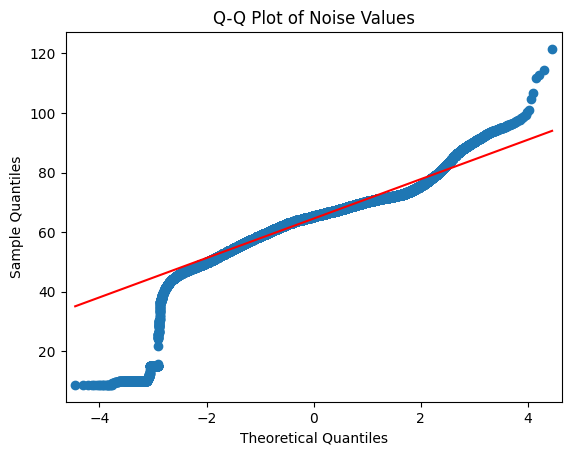

Shapiro-Wilk Test:
Test Statistic: 0.9244022844599601
P-value: 4.046858327714999e-122


In [148]:
noise_values = d['noise_values']

sm.qqplot(noise_values, line='s')
plt.title('Q-Q Plot of Noise Values')
plt.show()

shapiro_test = stats.shapiro(noise_values)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_test[0]}")
print(f"P-value: {shapiro_test[1]}")

#9. Correlación de variables

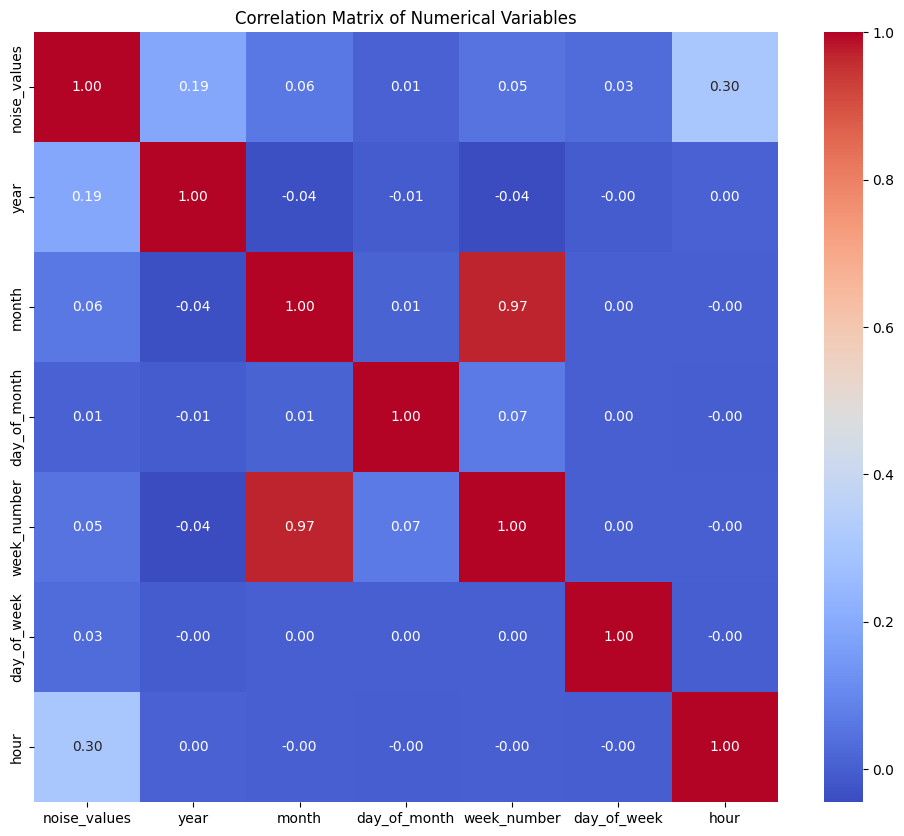

In [149]:
numerical_cols = d.select_dtypes(include=np.number).columns

correlation_matrix = d[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

#10. LIMPIEZA DE OUTLIERS

In [150]:
d = d[(d['noise_values'] >= lower_bound) & (d['noise_values'] <= upper_bound)]

#11. Verificación del Dataset Final

Continua el comportamiento normal:

Text(0, 0.5, 'Frequency')

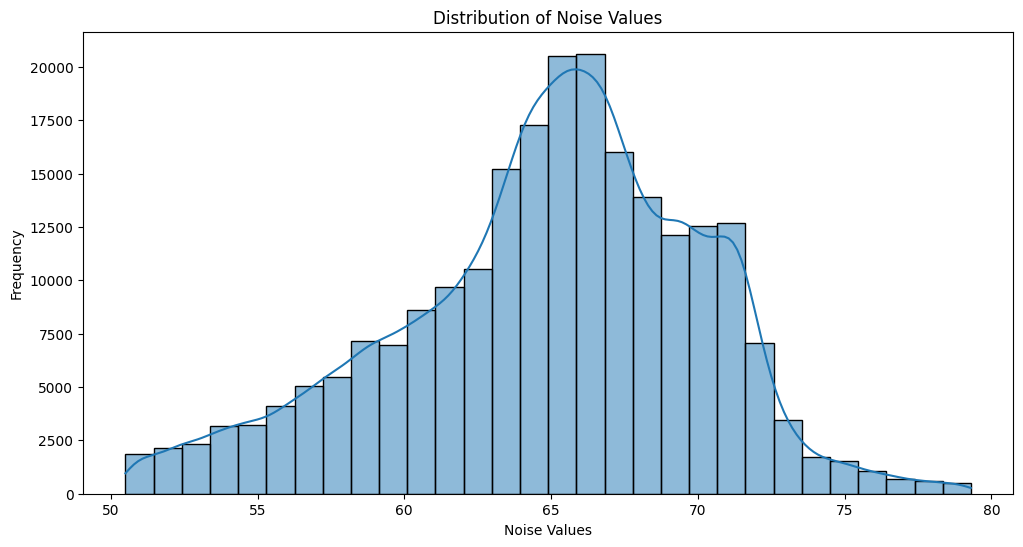

In [151]:
plt.figure(figsize=(12, 6))
sns.histplot(d['noise_values'], kde=True, bins=30)
plt.title('Distribution of Noise Values')
plt.xlabel('Noise Values')
plt.ylabel('Frequency')


#No vemos atípicos en el gráfico:

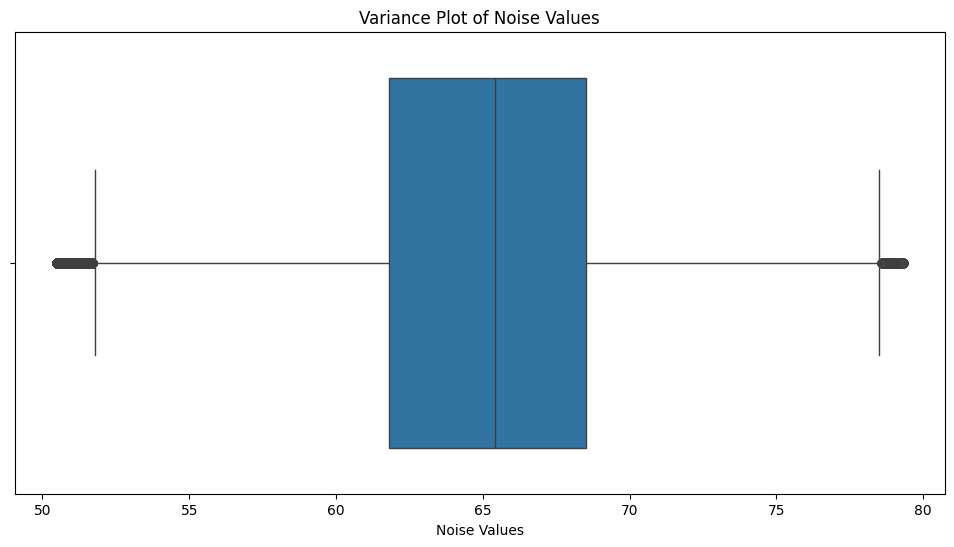

In [152]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=d['noise_values'])
plt.title('Variance Plot of Noise Values')
plt.xlabel('Noise Values')
plt.show()


La tendencia se mantiene y tanto el T Score como el P Values mejoran notablemente.

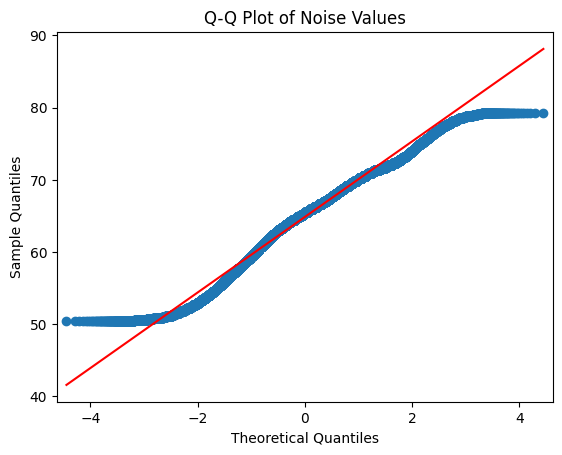

Shapiro-Wilk Test:
Test Statistic: 0.983997755062973
P-value: 7.135406249533696e-81


In [153]:
noise_values = d['noise_values']

sm.qqplot(noise_values, line='s')
plt.title('Q-Q Plot of Noise Values')
plt.show()

shapiro_test = stats.shapiro(noise_values)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_test[0]}")
print(f"P-value: {shapiro_test[1]}")